In [1]:
from pathlib import Path  
from matplotlib import pyplot as plot
from pathlib import Path  
import pandas as pandas
import numpy as numpy
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


In [2]:
dataframe = pandas.read_csv("dataset.csv").dropna()
dataframe["date"] = pandas.to_datetime(dataframe['date'], format='%Y-%m-%d %H:%M:%S')
dataframe["NSM"] = (dataframe["date"] - pandas.to_datetime(dataframe['date'].dt.date, format='%Y-%m-%d')).dt.total_seconds()
dataframe["week_status"] = dataframe["date"].apply(lambda date: 1 if(date.weekday() <= 4) else 0)
dataframe["day_of_monday"] = dataframe["date"].apply(lambda date: date.weekday() == 0)
dataframe["day_of_tuesday"] = dataframe["date"].apply(lambda date: date.weekday() == 1)
dataframe["day_of_wednesday"] = dataframe["date"].apply(lambda date: date.weekday() == 2)
dataframe["day_of_thursday"] = dataframe["date"].apply(lambda date: date.weekday() == 3)
dataframe["day_of_friday"] = dataframe["date"].apply(lambda date: date.weekday() == 4)
dataframe["day_of_saturday"] = dataframe["date"].apply(lambda date: date.weekday() == 5)
dataframe["day_of_sunday"] = dataframe["date"].apply(lambda date: date.weekday() == 6)
dataframe = dataframe.drop("date", axis = 1).dropna()
dataframe.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,rv2,NSM,week_status,day_of_monday,day_of_tuesday,day_of_wednesday,day_of_thursday,day_of_friday,day_of_saturday,day_of_sunday
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,13.275433,61200.0,1,True,False,False,False,False,False,False
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.606195,61800.0,1,True,False,False,False,False,False,False
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,28.642668,62400.0,1,True,False,False,False,False,False,False
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.410389,63000.0,1,True,False,False,False,False,False,False
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,10.084097,63600.0,1,True,False,False,False,False,False,False


In [3]:
X = dataframe.drop("Appliances", axis = 1)
y = dataframe["Appliances"]
TEST_SIZE_RATIO = 0.20
RANDOM_STATE_SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE_RATIO, random_state=RANDOM_STATE_SEED)

In [4]:
performance = {}
for C in range(1,21):
    performance[C] = {}
    for gamma in ["scale"]:
        support_vector_regressor = SVR(C=C, gamma=gamma, verbose=True)
        support_vector_regressor.fit(X_train, y_train)
        performance[C][gamma] = {}
        for metric_set in {"full": (X, y), "train": (X_train, y_train), "test": (X_test, y_test)}.items():
            y_pred = support_vector_regressor.predict(metric_set[1][0])
            performance[C][gamma][metric_set[0]]= {
                "root_mean_square_error": mean_squared_error(metric_set[1][1], y_pred, squared=False),
                "r2_score": r2_score(metric_set[1][1], y_pred),
                "mean_absolute_error": mean_absolute_error(metric_set[1][1], y_pred),
                "mean_absolute_percentage_error": mean_absolute_percentage_error(metric_set[1][1], y_pred)
            }

[LibSVM].........
*
optimization finished, #iter = 9440
obj = -706657.901076, rho = -41.360691
nSV = 15565, nBSV = 15561
[LibSVM].........
*.
*.
*
optimization finished, #iter = 10115
obj = -1405577.628708, rho = -31.661672
nSV = 15247, nBSV = 15241
[LibSVM]..........
*.
*.
*
optimization finished, #iter = 11081
obj = -2102226.345897, rho = -24.744812
nSV = 15013, nBSV = 15008
[LibSVM].........
*.
*
optimization finished, #iter = 10227
obj = -2797723.820858, rho = -21.206665
nSV = 14889, nBSV = 14884
[LibSVM]..........
*
optimization finished, #iter = 10226
obj = -3492573.795495, rho = -18.447754
nSV = 14834, nBSV = 14828
[LibSVM]..........
*
optimization finished, #iter = 10706
obj = -4187065.072867, rho = -17.131897
nSV = 14782, nBSV = 14774
[LibSVM]..........
*
optimization finished, #iter = 10633
obj = -4881342.090798, rho = -16.486892
nSV = 14776, nBSV = 14768
[LibSVM]...........
*..
*.
*
optimization finished, #iter = 14036
obj = -5575385.145878, rho = -14.467887
nSV = 14837, nBS

In [7]:
performance_agg_by_prediction_set = {}
for C in performance.keys():
    for gamma in performance[C].keys():
        for prediction_set in performance[C][gamma]:
            for metrics in performance[C][gamma][prediction_set]:
                if prediction_set not in performance_agg_by_prediction_set.keys():
                    performance_agg_by_prediction_set[prediction_set] = {}
                if metrics not in performance_agg_by_prediction_set[prediction_set].keys():
                    performance_agg_by_prediction_set[prediction_set][metrics] = {}
                if gamma not in performance_agg_by_prediction_set[prediction_set][metrics].keys():
                    performance_agg_by_prediction_set[prediction_set][metrics][gamma] = {}
                performance_agg_by_prediction_set[prediction_set][metrics][gamma][C] = performance[C][gamma][prediction_set][metrics]
performance_agg_by_prediction_set

{'full': {'root_mean_square_error': {'scale': {1: 102.23317143442462,
    2: 101.99198556389669,
    3: 101.69094814033514,
    4: 101.76141118657195,
    5: 101.78886288125884,
    6: 101.82110039342714,
    7: 101.83306680746453,
    8: 101.84685967883905,
    9: 101.85045423739135,
    10: 101.8555501414957,
    11: 101.89906043035475,
    12: 101.90075748184954,
    13: 101.88955879180303,
    14: 101.88324256029453,
    15: 101.88553678750323,
    16: 101.88688522785733,
    17: 101.88762405326165,
    18: 101.88557842957161,
    19: 101.92668398517081,
    20: 101.92463074704379}},
  'r2_score': {'scale': {1: 0.005632216145141089,
    2: 0.010318455627366885,
    3: 0.01615208062993323,
    4: 0.014788164946325066,
    5: 0.014256541373453002,
    6: 0.013632053624427654,
    7: 0.01340019636147971,
    8: 0.013132916465209088,
    9: 0.013063254737277985,
    10: 0.012964493060357962,
    11: 0.012121036365787874,
    12: 0.01208813134340403,
    13: 0.012305258500559746,
    14

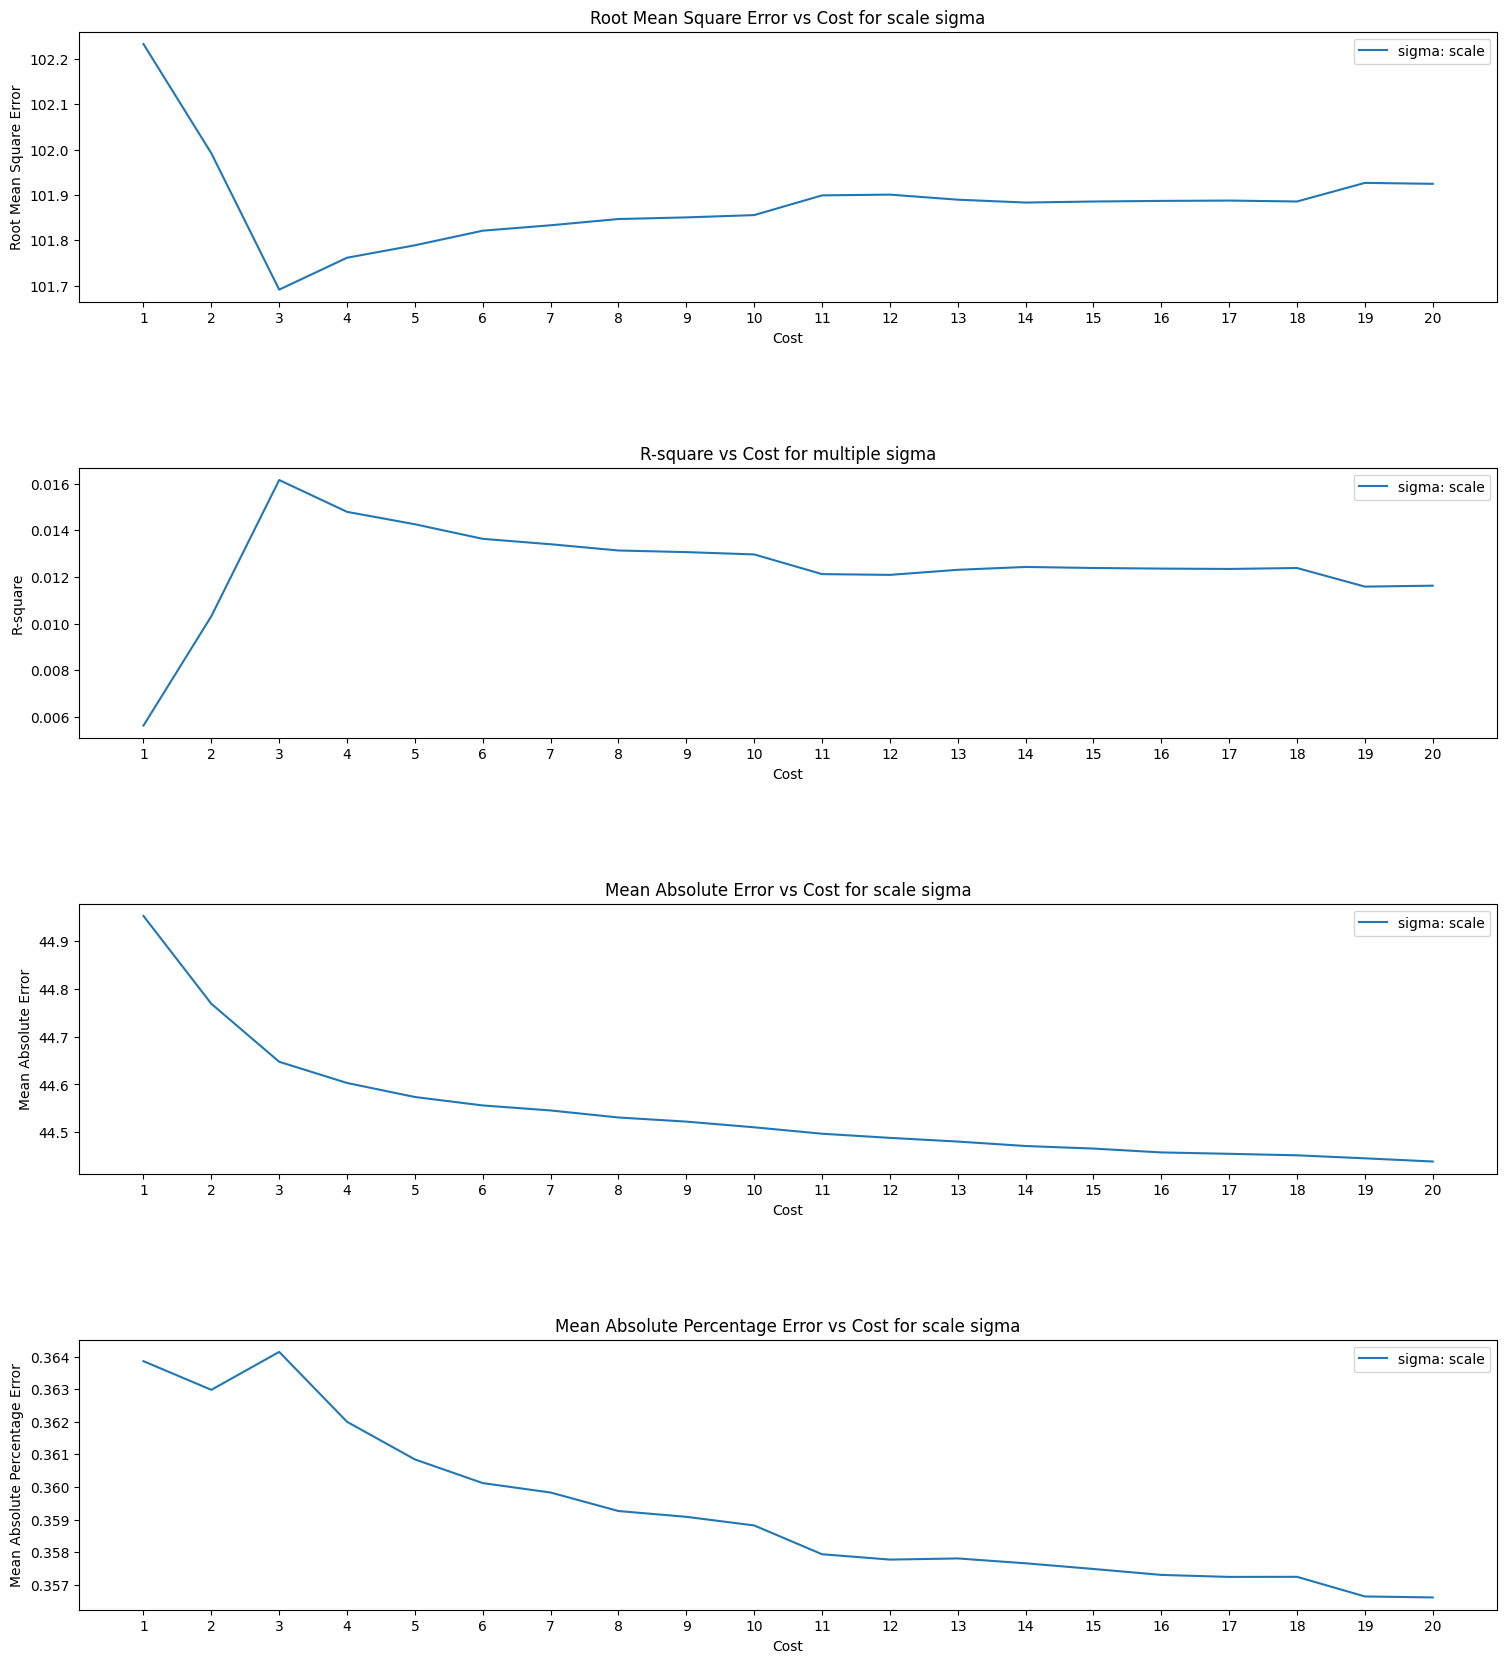

In [8]:
# Visualize model's metrics using line graph subplots.
# Reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

figure, (plot1, plot2, plot3, plot4) = plot.subplots(4)
plot.tight_layout()

plot1.set_title("Root Mean Square Error vs Cost for scale sigma")
plot1.set_xlabel('Cost')
plot1.set_ylabel('Root Mean Square Error')
plot1.set_xticks(range(1,21,1))
for gamma in performance_agg_by_prediction_set["full"]["root_mean_square_error"].keys():
    plot1.plot(list(performance_agg_by_prediction_set["full"]["root_mean_square_error"][gamma].keys()), list(performance_agg_by_prediction_set["full"]["root_mean_square_error"][gamma].values()), label = "sigma: "  + str(gamma))
plot1.legend(loc='upper right')

plot2.set_title("R-square vs Cost for multiple sigma")
plot2.set_xlabel('Cost')
plot2.set_ylabel('R-square')
plot2.set_xticks(range(1,21,1))
for gamma in performance_agg_by_prediction_set["full"]["r2_score"].keys():
    plot2.plot(list(performance_agg_by_prediction_set["full"]["r2_score"][gamma].keys()), list(performance_agg_by_prediction_set["full"]["r2_score"][gamma].values()), label = "sigma: "  + str(gamma))
plot2.legend(loc='upper right')


plot3.set_title("Mean Absolute Error vs Cost for scale sigma")
plot3.set_xlabel('Cost')
plot3.set_ylabel('Mean Absolute Error')
plot3.set_xticks(range(1,21,1))
for gamma in performance_agg_by_prediction_set["full"]["mean_absolute_error"].keys():
    plot3.plot(list(performance_agg_by_prediction_set["full"]["mean_absolute_error"][gamma].keys()), list(performance_agg_by_prediction_set["full"]["mean_absolute_error"][gamma].values()), label = "sigma: "  + str(gamma))
plot3.legend(loc='upper right')


plot4.set_title("Mean Absolute Percentage Error vs Cost for scale sigma")
plot4.set_xlabel('Cost')
plot4.set_ylabel('Mean Absolute Percentage Error')
plot4.set_xticks(range(1,21,1))
for gamma in performance_agg_by_prediction_set["full"]["mean_absolute_percentage_error"].keys():
    plot4.plot(list(performance_agg_by_prediction_set["full"]["mean_absolute_percentage_error"][gamma].keys()), list(performance_agg_by_prediction_set["full"]["mean_absolute_percentage_error"][gamma].values()), label = "sigma: "  + str(gamma))
plot4.legend(loc='upper right')

figure.set_figheight(18)
figure.set_figwidth(16)
figure.savefig("svr_metrics_vs_iteration_for_multiple_n_estimators.png")
figure.show()